In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
import os
print("Current Directory : ", os.getcwd())
curr_dir=os.getcwd()
train_path =os.path.join(curr_dir,"datasets","Train")
test_path =os.path.join(curr_dir,"datasets","Test")
valid_path =os.path.join(curr_dir,"datasets","Valid")


Current Directory :  g:\TANSUKH\CODING NOTES\potato-disease-project\datasets


In [7]:
train_path = os.path.join(curr_dir, "Train")

training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)
    

Found 900 files belonging to 3 classes.


In [8]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
valid_path = os.path.join(curr_dir, "valid")

validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)
    

Found 300 files belonging to 3 classes.


In [10]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding='same',activation ='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))



cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   130,057,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,070,435 (496.18 MB)

 Trainable params: 130,070,435 (496.18 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 260s 8s/step - accuracy: 0.3567 - loss: 261.6156 - val_accuracy: 0.6167 - val_loss: 14.9485
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 217s 7s/step - accuracy: 0.6935 - loss: 13.0727 - val_accuracy: 0.7600 - val_loss: 5.7586
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 220s 8s/step - accuracy: 0.8033 - loss: 4.0052 - val_accuracy: 0.7600 - val_loss: 2.0930
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 273s 8s/step - accuracy: 0.8370 - loss: 1.5432 - val_accuracy: 0.8733 - val_loss: 0.5326
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 218s 8s/step - accuracy: 0.8913 - loss: 0.4100 - val_accuracy: 0.8833 - val_loss: 0.3554
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.9494 - loss: 0.1543 - val_accuracy: 0.9067 - val_loss: 0.2783
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 232s 8s/step - accuracy: 0.9436 - loss: 0.1660 - val_accuracy: 0.9133 - val_loss: 0.2233
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 229s 8s/step - accuracy: 0.9670 - loss: 0.0791 - val_accuracy: 0.9167

In [22]:
train_loss, train_acc=cnn.evaluate(training_set)
print("training_accuracy :",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9999 - loss: 0.0131
training_accuracy : 0.9988889098167419


In [26]:
val_loss,val_acc=cnn.evaluate(validation_set)
print("validation accuracy:", val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9074 - loss: 0.3166
validation accuracy: 0.9133333563804626


In [27]:
cnn.save("trained_plant_disease_model.keras")

In [28]:
training_history.history

{'accuracy': [0.44111111760139465,
  0.7233333587646484,
  0.8066666722297668,
  0.8544444441795349,
  0.9144444465637207,
  0.9388889074325562,
  0.9555555582046509,
  0.9599999785423279,
  0.9688888788223267,
  0.9700000286102295],
 'loss': [135.63824462890625,
  10.016130447387695,
  3.246534585952759,
  1.2202067375183105,
  0.2938806414604187,
  0.1609998643398285,
  0.13131040334701538,
  0.09349214285612106,
  0.06951262801885605,
  0.08063359558582306],
 'val_accuracy': [0.6166666746139526,
  0.7599999904632568,
  0.7599999904632568,
  0.8733333349227905,
  0.8833333253860474,
  0.9066666960716248,
  0.9133333563804626,
  0.9166666865348816,
  0.9433333277702332,
  0.9133333563804626],
 'val_loss': [14.948511123657227,
  5.758620738983154,
  2.093043327331543,
  0.5325899720191956,
  0.3554472327232361,
  0.2782551944255829,
  0.22329236567020416,
  0.21908408403396606,
  0.2196706086397171,
  0.2793062627315521]}

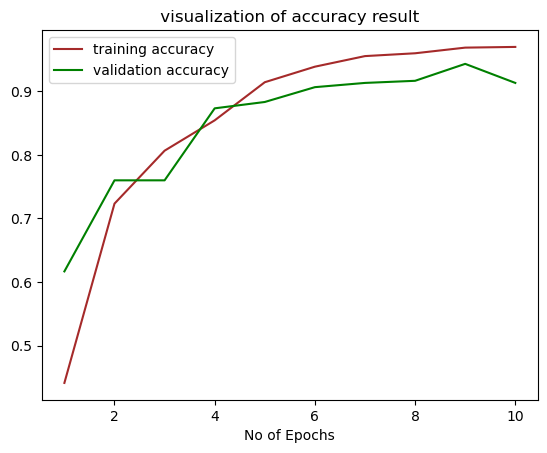

In [29]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color="brown",label="training accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color="green",label="validation accuracy")
plt.xlabel("No of Epochs")
plt.title(" visualization of accuracy result ")
plt.legend()
plt.show()